In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 2500 MB, cuDNN 5105)


In [2]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_train_thres_10.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_train_thres_10.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_valid_thres_10.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_valid_thres_10.npy')
X_test = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_test_thres_10.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_test_thres_10.npy')

"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [3]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [ ]:
from models_exp import LongRangeDNN
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)

In [ ]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/500
Epoch 0: validation loss: 0.692
Balanced Accuracy: 53.38%	 auROC: 0.558	 auPRC: 0.542	 auPRG: 0.097
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 2s - loss: 1.7643 - val_loss: 0.6921
Epoch 2/500
Epoch 1: validation loss: 0.693
Balanced Accuracy: 51.93%	 auROC: 0.531	 auPRC: 0.538	 auPRG: 0.007
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 2s - loss: 1.8213 - val_loss: 0.6929
Epoch 3/500
Epoch 2: validation loss: 0.693
Balanced Accuracy: 51.93%	 auROC: 0.522	 auPRC: 0.541	 auPRG: -0.006
Recall at 5%|10%|20% FDR: 0.6%|0.6%|0.6%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 2s - loss: 1.6927 - val_loss: 0.6933
Epoch 4/500
Epoch 3: validation loss: 0.694
Balanced Accuracy: 51.93%	 auROC: 0.522	 auPRC: 0.549	 a

In [ ]:
print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))

In [ ]:
print(dnn_normalized.test(X_train_normalized[:, :, :10:, :], y_train))

In [ ]:
print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))

In [187]:
ipred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [64]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)

In [65]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.2712Epoch 0: validation loss: 0.610
Balanced Accuracy: 69.13%	 auROC: 0.748	 auPRC: 0.734	 auPRG: 0.540
Recall at 5%|10%|20% FDR: 2.3%|2.3%|50.8%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.2793 - val_loss: 0.6099
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.0544Epoch 1: validation loss: 0.624
Balanced Accuracy: 71.38%	 auROC: 0.767	 auPRC: 0.771	 auPRG: 0.555
Recall at 5%|10%|20% FDR: 1.3%|1.3%|53.7%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.0431 - val_loss: 0.6243
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 0.9594Epoch 2: validation loss: 0.613
Balanced Accuracy: 69.94%	 auROC: 0.775	 auPRC: 0.787	 auPRG: 0.581
Recall at 5%|10%|20% FDR: 3.5%|32.2%|58.8%	 Num Positives: 311	 

In [66]:
print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))

Balanced Accuracy: 70.37%	 auROC: 0.776	 auPRC: 0.786	 auPRG: 0.569
Recall at 5%|10%|20% FDR: 0.0%|21.4%|55.1%	 Num Positives: 243	 Num Negatives: 243	 


# with distance only

In [67]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [68]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 2.2666Epoch 0: validation loss: 0.745
Balanced Accuracy: 57.72%	 auROC: 0.605	 auPRC: 0.588	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 2.1379 - val_loss: 0.7453
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3789Epoch 1: validation loss: 0.678
Balanced Accuracy: 57.88%	 auROC: 0.605	 auPRC: 0.587	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.3723 - val_loss: 0.6782
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3478Epoch 2: validation loss: 0.690
Balanced Accuracy: 57.88%	 auROC: 0.605	 auPRC: 0.587	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num 

In [69]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

Balanced Accuracy: 56.58%	 auROC: 0.576	 auPRC: 0.566	 auPRG: 0.131
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 243	 Num Negatives: 243	 


# Print prediction

In [70]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [71]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [72]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [73]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


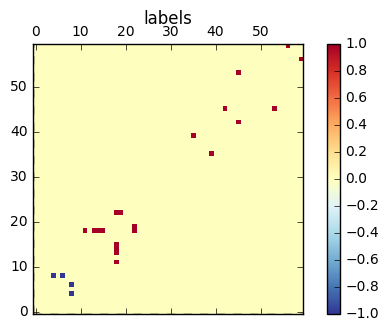

1.0
(60, 60)
Limit: 1.0


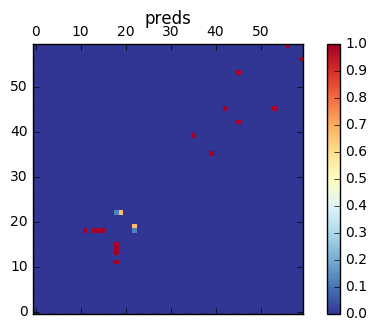

In [74]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )